In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import csv
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model

In [98]:
train_dir = 'C:/Users/Somn117/Documents/hand_dataset/test_arm/data_train/'
train_label_file = 'C:/Users/Somn117/Documents/hand_dataset/test_arm/coordi_train.csv'
train_coordi_dict ={}
with open(train_label_file) as f:
    lines = f.read().splitlines()
for line in lines:
    elements=line.split(',')
    train_coordi_dict[elements[0]]=elements[1:]
    
test_dir = 'C:/Users/Somn117/Documents/hand_dataset/test_arm/data_test/'
test_label_file = 'C:/Users/Somn117/Documents/hand_dataset/test_arm/coordi_test.csv'
test_coordi_dict ={}
with open(test_label_file) as f:
    lines = f.read().splitlines()
for line in lines:
    elements=line.split(',')
    test_coordi_dict[elements[0]]=elements[1:]

train_sample = len(os.listdir(train_dir))
test_sample = len(os.listdir(test_dir))
print("Train Set samples: "+str(train_sample))
print("Test Set samples: "+str(test_sample))

Train Set samples: 1155
Test Set samples: 49


In [99]:

    train_x_data_set = np.zeros([train_sample,100,100,3])
    train_y_data_set = np.zeros([train_sample,4])


In [100]:
for index,filename in enumerate(os.listdir(train_dir)):
    try:
        img = Image.open(train_dir+filename)
        img = img.resize((100,100),Image.ANTIALIAS)
        im = np.array(img)
        train_x_data_set[index,:,:,:]=im
        train_y_data_set[index,:]=train_coordi_dict[filename]
    except:
        print(filename)
        os.remove(train_dir+filename)

frame0657.jpg
frame0666.jpg
frame0678.jpg
frame0683.jpg
frame0687.jpg
frame0696.jpg
frame0706.jpg
frame0713.jpg
frame0714.jpg
frame0723.jpg
frame0729.jpg
frame0739.jpg
frame0753.jpg
frame0779.jpg
frame0798.jpg
frame0804.jpg
frame0810.jpg
frame0831.jpg
frame0851.jpg
frame0863.jpg
frame0871.jpg
frame0875.jpg
frame0878.jpg
frame0894.jpg
frame0951.jpg
frame0961.jpg
frame0962.jpg
frame0965.jpg
frame0968.jpg
frame0970.jpg
frame1004.jpg
frame1008.jpg
frame1017.jpg
frame1023.jpg
frame1032.jpg
frame1035.jpg
frame1036.jpg
frame1038.jpg
frame1040.jpg
frame1045.jpg
frame2200.jpg
frame2201.jpg
frame2202.jpg
frame2203.jpg
frame2204.jpg
frame2206.jpg
frame2207.jpg
frame2208.jpg
frame2209.jpg
frame2211.jpg
frame2212.jpg
frame2213.jpg
frame2214.jpg
frame2215.jpg
frame2216.jpg
frame2217.jpg
frame2218.jpg
frame2219.jpg
frame2221.jpg
frame2222.jpg
frame2223.jpg
frame2224.jpg
frame2225.jpg
frame2226.jpg
frame2227.jpg
frame2228.jpg
frame2229.jpg
frame2231.jpg
frame2232.jpg
frame2233.jpg
frame2234.jpg
frame2

In [101]:
train_x_data_set = train_x_data_set/255

In [102]:
model = Sequential()

model.add(Conv2D(8,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(12,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(18,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4,activation='sigmoid'))


In [103]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [104]:
model.fit(train_x_data_set,train_y_data_set,epochs=40)

Epoch 1/40
37/37 [==============================] - 9s 113ms/step - loss: 0.0910
Epoch 2/40
37/37 [==============================] - 4s 107ms/step - loss: 0.0627
Epoch 3/40
37/37 [==============================] - 4s 99ms/step - loss: 0.0578
Epoch 4/40
37/37 [==============================] - 4s 100ms/step - loss: 0.0454
Epoch 5/40
37/37 [==============================] - 4s 101ms/step - loss: 0.0401
Epoch 6/40
37/37 [==============================] - 4s 99ms/step - loss: 0.0406
Epoch 7/40
37/37 [==============================] - 4s 100ms/step - loss: 0.0360
Epoch 8/40
37/37 [==============================] - 4s 98ms/step - loss: 0.0313
Epoch 9/40
37/37 [==============================] - 4s 98ms/step - loss: 0.0317
Epoch 10/40
37/37 [==============================] - 4s 99ms/step - loss: 0.0329
Epoch 11/40
37/37 [==============================] - 4s 98ms/step - loss: 0.0268
Epoch 12/40
37/37 [==============================] - 4s 96ms/step - loss: 0.0288
Epoch 13/40
37/37 [=============

In [107]:
test_x_data_set = np.zeros([test_sample,100,100,3])
test_y_data_set = np.zeros([test_sample,4])
for index,filename in enumerate(os.listdir(test_dir)):
   try:
    img = Image.open(test_dir+filename)
    img = img.resize((100,100),Image.ANTIALIAS)
    im = np.array(img)
    test_x_data_set[index,:,:,:]=im
    test_y_data_set[index,:]=test_coordi_dict[filename]
   except:
        print(filename)
        os.remove(test_dir+filename)  
test_x_data_set = test_x_data_set/255

frame0015.jpg
frame0078.jpg
frame0183.jpg
frame0501.jpg
frame0549.jpg
frame0616.jpg
frame0669.jpg
frame0722.jpg
frame0819.jpg
frame0872.jpg
frame0899.jpg
frame0969.jpg
frame1086.jpg
frame1092.jpg
frame1149.jpg
frame1201.jpg
frame1246.jpg
frame1257.jpg
frame1373.jpg
frame1417.jpg
frame1490.jpg
h30.jpg


In [108]:
model.evaluate(test_x_data_set,test_y_data_set)

2/2 [==============================] - 1s 21ms/step - loss: 0.2030


0.20296408236026764

In [115]:
model=load_model('C:/Users/Somn117/Documents/hand_dataset/test_arm/hand1608')
predictions=model.predict(test_x_data_set)
j=0
with open('C:/Users/Somn117/Documents/hand_dataset/test_arm/predictions.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    for j in predictions:
    # write a row to the csv file
        writer.writerow(j)
        
result=test_coordi_dict[i]-predictions[i]
with open('C:/Users/Somn117/Documents/hand_dataset/test_arm/result.csv', 'r') as fl:
 # create the csv writer
    writer = csv.writer(fl)
    for j in result:
    # write a row to the csv file
        writer.writerow(j)     
        
predictions

array([[9.3554974e-02, 6.7791790e-02, 4.6446723e-01, 6.1882228e-01],
       [1.7176828e-01, 1.7302692e-02, 4.4323304e-01, 3.6421287e-01],
       [5.8631510e-02, 5.9051871e-02, 2.3811907e-01, 3.1230795e-01],
       [4.1059470e-01, 2.6757544e-01, 7.6612705e-01, 5.6716889e-01],
       [4.3570831e-01, 5.7757229e-01, 8.7391376e-01, 9.5179880e-01],
       [2.8471053e-03, 6.6655070e-02, 2.8414759e-01, 5.9872508e-01],
       [3.1605682e-01, 2.5262833e-02, 6.4122182e-01, 3.2948703e-01],
       [4.0486455e-04, 2.4493724e-02, 4.1586173e-01, 7.3936898e-01],
       [1.3927597e-01, 6.2515301e-01, 6.8692243e-01, 9.9734348e-01],
       [3.1610519e-01, 3.5521835e-02, 5.6436777e-01, 3.9169660e-01],
       [2.8384566e-01, 2.1562815e-02, 7.5101340e-01, 5.0874990e-01],
       [7.1301758e-03, 6.0576987e-01, 5.1326585e-01, 9.4876504e-01],
       [3.1729639e-03, 2.2763908e-03, 2.4120629e-01, 5.0109661e-01],
       [1.1424124e-03, 4.4319034e-03, 4.9299681e-01, 4.9990940e-01],
       [3.4184158e-03, 4.4752297e-

In [116]:
test_x_data_set[7].shape
import tensorflow as tf
print(tf.__version__)

2.5.0


[0.09355497 0.06779179 0.46446723 0.6188223 ]


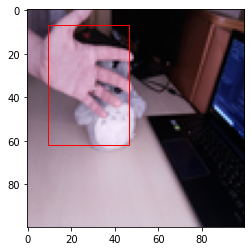

[0.17176828 0.01730269 0.44323304 0.36421287]


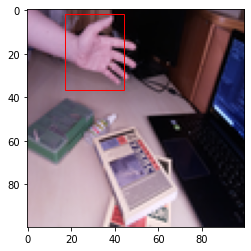

[0.05863151 0.05905187 0.23811907 0.31230795]


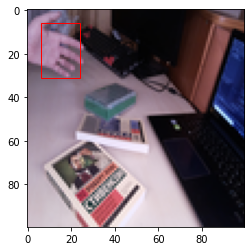

[0.4105947  0.26757544 0.76612705 0.5671689 ]


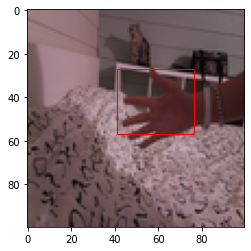

[0.4357083  0.5775723  0.87391376 0.9517988 ]


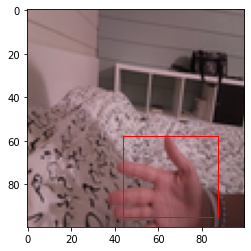

[0.00284711 0.06665507 0.2841476  0.5987251 ]


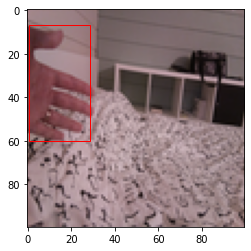

[0.31605682 0.02526283 0.6412218  0.32948703]


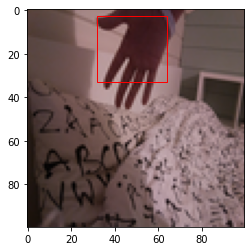

[4.0486455e-04 2.4493724e-02 4.1586173e-01 7.3936898e-01]


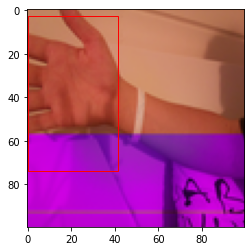

[0.13927597 0.625153   0.68692243 0.9973435 ]


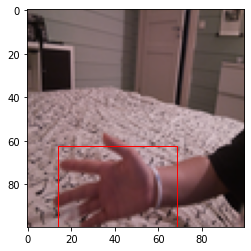

[0.3161052  0.03552184 0.5643678  0.3916966 ]


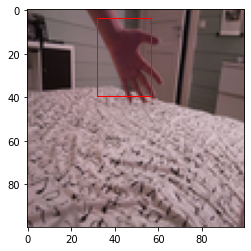

[0.28384566 0.02156281 0.7510134  0.5087499 ]


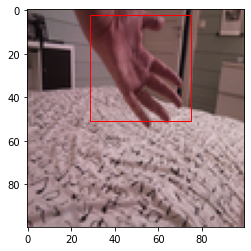

[0.00713018 0.6057699  0.51326585 0.94876504]


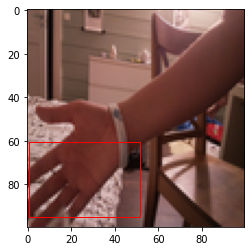

[0.00317296 0.00227639 0.24120629 0.5010966 ]


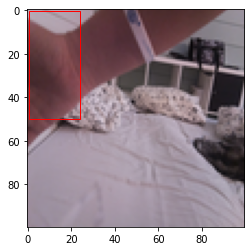

[0.00114241 0.0044319  0.4929968  0.4999094 ]


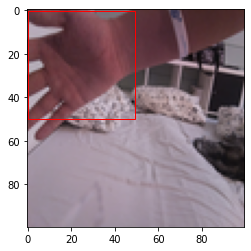

[0.00341842 0.44752297 0.22472051 0.85839295]


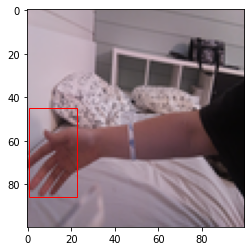

[0.58062065 0.06310573 0.88489807 0.66859514]


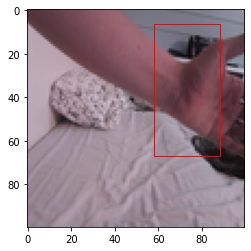

[0.18788838 0.67098033 0.6503937  0.99165004]


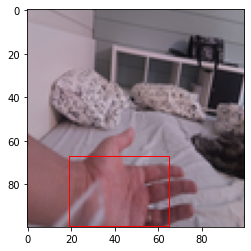

[0.01964328 0.20575693 0.29232305 0.59172785]


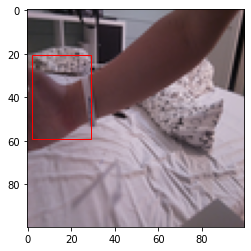

[0.08183226 0.11042875 0.48070604 0.64975566]


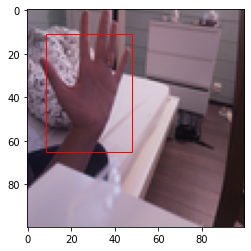

[0.5524533  0.49001285 0.9031034  0.7628914 ]


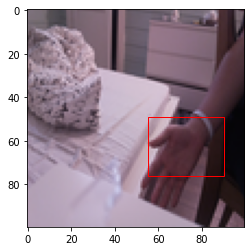

[0.00433236 0.14748403 0.45739558 0.80988497]


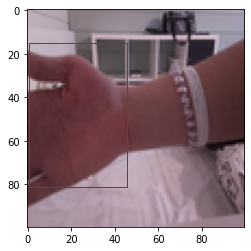

[0.68031156 0.39102042 0.9944659  0.8643501 ]


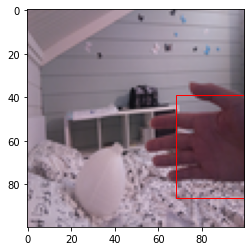

In [117]:
for i in range(22):
    print(predictions[i])
    hight = predictions[i][2]-predictions[i][0]
    width = predictions[i][3]-predictions[i][1]
    test_img = Image.fromarray(np.uint8(test_x_data_set[i]*255))
    fig,ax = plt.subplots(1)
    ax.imshow(test_img)
    rect = patches.Rectangle((predictions[i][0]*100,predictions[i][1]*100),hight*100,width*100,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.savefig('C:/Users/Somn117/Documents/hand_dataset/test_arm/results/frame%04d.jpg' % i)
    plt.show()
    

In [118]:
model.save('C:/Users/Somn117/Documents/hand_dataset/test_arm/model/hand2108_3_10')

INFO:tensorflow:Assets written to: C:/Users/Somn117/Documents/hand_dataset/test_arm/model/hand2108_3_10\assets
